In [57]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from scipy.stats import f
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data = pd.read_csv('ex3.csv')  # Update with your file path
X = data[['x2', 'x3', 'x4', 'x5']]
y = data['y']

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
coefficients = model.coef_

print(f"Model: y = {intercept} + {coefficients[0]}*x2 + {coefficients[1]}*x3 + {coefficients[2]}*x4 + {coefficients[3]}*x5")


Model: y = 7.457806591400103 + -0.029702795413103587*x2 + 0.5205100837280618*x3 + -0.10180237857061875*x4 + -2.160580699394822*x5


In [18]:
y_pred = model.predict(X)

residuals = y - y_pred

noise_variance = np.var(residuals)
print(f"Nonbiased estimator for noise variance: {noise_variance}")


Nonbiased estimator for noise variance: 0.5741650999368751


In [19]:
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean) ** 2)
ss_regression = np.sum((y_pred - y_mean) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)

n = len(y)
p = X.shape[1]
df_model = p
df_residual = n - p - 1
df_total = n - 1

ms_regression = ss_regression / df_model
ms_residual = ss_residual / df_residual

f_stat = ms_regression / ms_residual

table_data = {
    'Source': ['Regression', 'Residuals', 'Total'],
    'Sum of Squares': [ss_regression, ss_residual, ss_total],
    'df': [df_model, df_residual, df_total],
    'MS': [ms_regression, ms_residual, None],
    'F': [f_stat, None, None]
}

results_df = pd.DataFrame(table_data)
print(results_df)


       Source  Sum of Squares  df        MS         F
0  Regression       22.311916   4  5.577979  7.158376
1   Residuals       10.909137  14  0.779224       NaN
2       Total       33.221053  18       NaN       NaN


In [35]:
X_new = np.array([20, 30, 90, 2]).reshape(1, -1)
X_new_df = pd.DataFrame(X_new, columns=['x2', 'x3', 'x4', 'x5'])
y_new = model.predict(X_new_df)[0]

print(f"D: {y_new}")

D: 8.995677724834556


In [47]:
X_with_intercept = np.hstack([np.ones((X.shape[0], 1)), X.to_numpy()])  # Ensure X is a NumPy array
X_transpose_X_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)

X_new_with_intercept = np.hstack([np.array([[1]]), X_new])

var_y_new = noise_variance * (X_new_with_intercept @ X_transpose_X_inv @ X_new_with_intercept.T)
se_y_new = np.sqrt(var_y_new[0][0])

z = norm.ppf(0.975)
lower_bound = y_new - z * se_y_new
upper_bound = y_new + z * se_y_new

print(f"Q4E: for expectation CI, 95% Confidence Interval for Y_new: ({lower_bound:.2f}, {upper_bound:.2f})")

Q4E: for expectation CI, 95% Confidence Interval for Y_new: (8.20, 9.79)


In [55]:
var_y_new_expectation = noise_variance * (X_new_with_intercept @ X_transpose_X_inv @ X_new_with_intercept.T)
var_y_new_prediction = noise_variance + var_y_new_expectation  # Include residual variance
se_y_new_prediction = np.sqrt(var_y_new_prediction[0][0])  # Extract scalar value

lower_bound = y_new - z * se_y_new_prediction
upper_bound = y_new + z * se_y_new_prediction

print(f"Q4F: Prediction Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")


Q4F: Prediction Interval: [7.31, 10.68]


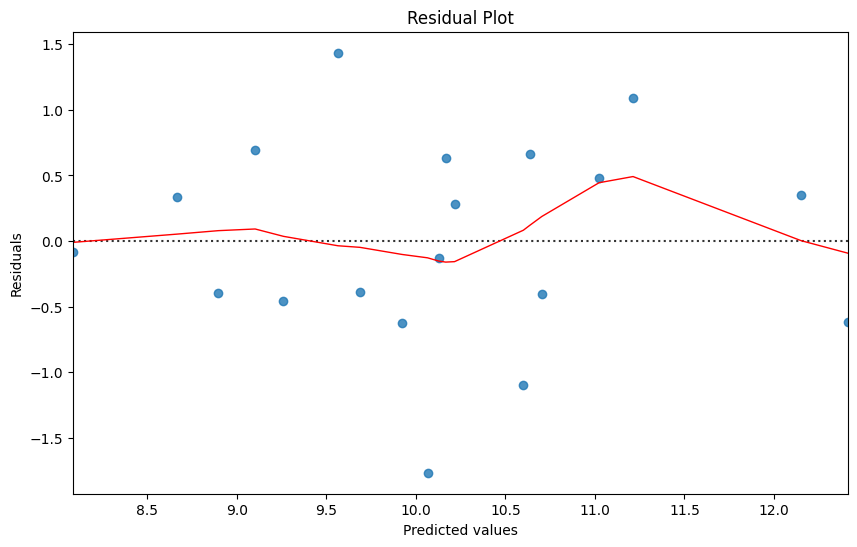

In [58]:
# checking Linearity:
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


**Residual analysis:** It seems that there is a curve showing a trend. Therefore,  the linearity assumption doesn't neccessarily hold.